In [1]:
import numpy as np
import matplotlib.pyplot as plt

import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.NoisyClairvoyant import NoisyClairvoyant
%matplotlib inline

In [2]:
cust_json = "customer3.json"
today_customer = 100
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph2_sparse.json"
arms = settings.prices

environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)

clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm = environment.estimate_clairvoyant()

print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
loading: [===                           ] 6.8%
loading: [===                           ] 7.8%
loading: [===                           ] 8.8%
loading: [===                           ] 9.8%
loading: [====                          ] 10.7%
loading: [====                          ] 11.7%
loading: [====                          ] 12.7%
loading: [=====                         ] 13.7%
loading: [=====                         ] 14.6%
loading: [=====                         ] 15.6%
loading: [=====                         ] 16.6%
loading: [======                        ] 17.6%
loading: [======                        ] 18.6%
loading: [======                        ] 19.5%
loa

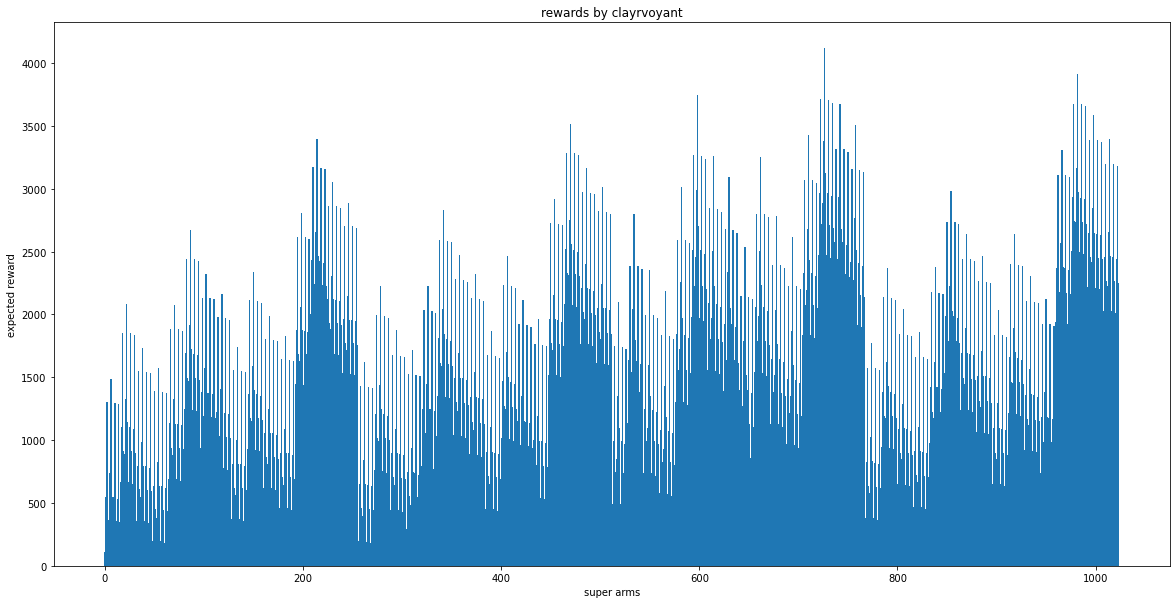

In [3]:
arms2 = list(rew_per_arm.keys())
indexes = []
for i, a in enumerate(arms2):
    indexes.append(i)
rewards = list(rew_per_arm.values())

plt.figure(figsize=(20,10))
plt.bar(indexes, rewards, width=1.2)
plt.xlabel("super arms")
plt.ylabel("expected reward")
plt.title("rewards by clayrvoyant")
plt.show()

In [4]:
n_arms = 4
n_products = 5

TIME_HORIZON = 300
NUM_ITERATION = 5

In [5]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    gr_learner = GreedyLearner(n_arms, n_products, environment.customers, graph_json, arms, environment.customers_distribution)

    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
            
        super_arm = gr_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        gr_learner.update(super_arm.copy(), report)
        prices = [arms[p][a] for p, a in enumerate(super_arm)]
        
        
    rewards = gr_learner.get_rewards()
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

loading: [                              ] 0.0%
[0 0 0 0 0]
[0 0 0 0 1]
[1 0 0 0 0]
[0 1 0 0 0]
[0 0 0 1 0]
[0 0 1 0 0]
[1 0 1 0 0]
[0 0 2 0 0]
[0 0 1 0 1]
[0 1 1 0 0]
loading: [=                             ] 3.3%
[0 0 1 1 0]
[0 0 1 2 0]
[1 0 1 1 0]
[0 1 1 1 0]
[0 0 1 1 1]
[0 0 2 1 0]
[0 1 2 1 0]
[0 0 3 1 0]
[0 0 2 2 0]
[1 0 2 1 0]
loading: [==                            ] 6.7%
[0 0 2 1 1]
[0 1 2 1 1]
[0 0 2 2 1]
[0 0 2 1 2]
[1 0 2 1 1]
[0 0 3 1 1]
[0 0 3 2 1]
[1 0 3 1 1]
[0 1 3 1 1]
[0 0 3 1 2]
loading: [===                           ] 10.0%
[0 0 3 2 1]
[0 0 3 1 2]
[1 0 3 1 1]
[0 1 3 1 1]
[0 1 3 1 1]
[1 0 3 1 1]
[0 0 3 1 2]
[0 0 3 2 1]
[0 0 3 1 2]
[1 0 3 1 1]
loading: [====                          ] 13.3%
[0 1 3 1 1]
[0 0 3 2 1]
[0 0 3 1 2]
[0 1 3 1 1]
[1 0 3 1 1]
[0 0 3 2 1]
[0 0 3 2 1]
[1 0 3 1 1]
[0 0 3 1 2]
[0 1 3 1 1]
loading: [=====                         ] 16.7%
[1 0 3 1 1]
[0 0 3 2 1]
[0 1 3 1 1]
[0 0 3 1 2]
[0 0 3 2 1]
[0 1 3 1 1]
[0 0 3 1 2]
[1 0 3 1 1]
[1 0 3 1 1]
[0 1 3 

[3 3 1 3 3]
[3 3 1 3 3]
[3 2 2 3 3]
[3 3 1 3 3]
[3 2 2 3 3]
[3 2 2 3 3]
[3 3 1 3 3]
[3 2 2 3 3]
[3 3 1 3 3]
loading: [=======================       ] 76.7%
[3 2 2 3 3]
[3 3 1 3 3]
[3 2 2 3 3]
[3 3 1 3 3]
[3 3 1 3 3]
[3 2 2 3 3]
[3 3 1 3 3]
[3 2 2 3 3]
[3 2 2 3 3]
[3 3 1 3 3]
loading: [========================      ] 80.0%
[3 3 1 3 3]
[3 2 2 3 3]
[3 2 2 3 3]
[3 3 1 3 3]
[3 3 1 3 3]
[3 2 2 3 3]
[3 3 1 3 3]
[3 2 2 3 3]
[3 2 2 3 3]
[3 3 1 3 3]
loading: [==========================    ] 83.3%
[3 2 2 3 3]
[3 3 1 3 3]
[3 2 2 3 3]
[3 3 1 3 3]
[3 3 1 3 3]
[3 2 2 3 3]
[3 2 2 3 3]
[3 3 1 3 3]
[3 2 2 3 3]
[3 3 1 3 3]
loading: [==========================    ] 86.7%
[3 2 2 3 3]
[3 3 1 3 3]
[3 2 2 3 3]
[3 3 1 3 3]
[3 2 2 3 3]
[3 3 1 3 3]
[3 2 2 3 3]
[3 3 1 3 3]
[3 2 2 3 3]
[3 3 1 3 3]
loading: [===========================   ] 90.0%
[3 2 2 3 3]
[3 3 1 3 3]
[3 2 2 3 3]
[3 3 1 3 3]
[3 3 1 3 3]
[3 2 2 3 3]
[3 3 1 3 3]
[3 2 2 3 3]
[3 3 1 3 3]
[3 2 2 3 3]
loading: [============================  ] 93.3%
[3 3

[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
loading: [============                  ] 40.0%
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
loading: [=============                 ] 43.3%
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
loading: [==============                ] 46.7%
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
loading: [===============               ] 50.0%
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
loading: [================              ] 53.3%
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
[3 3 3 3 1]
loading: [=================             ] 56.7%
[3 3 3 3 1]
[3 3 3 3 1]
[3 3

(5, 300)

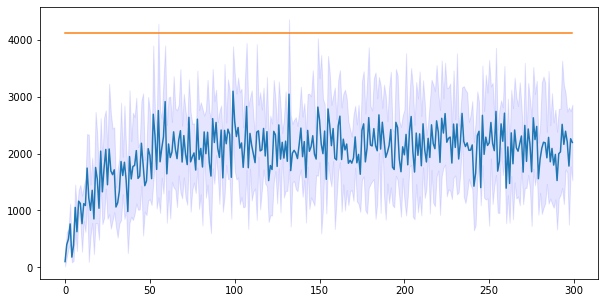

In [6]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)
plt.plot(range(len(rewards)), [clairvoyant_reward] * len(rewards))
plt.show()

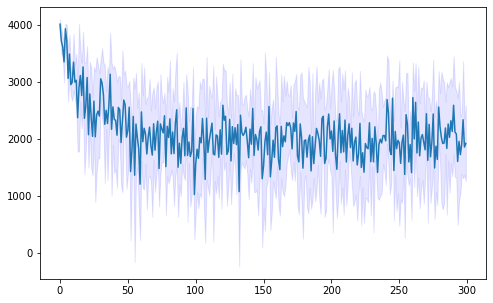

In [7]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
mean_regret = np.mean(regret, axis=0)
std_regret = np.std(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.fill_between(range(len(mean_regret)), (mean_regret-std_regret), (mean_regret+std_regret), color='b', alpha=.1)
plt.show()

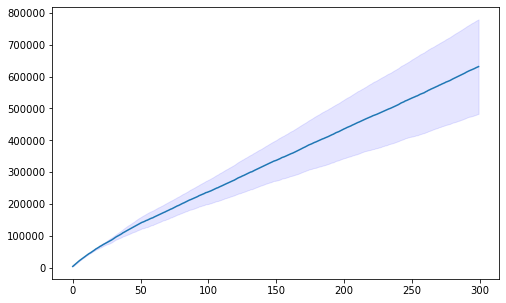

In [8]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)
cum_reg_std = np.std(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.fill_between(range(len(cum_reg_mean)), (cum_reg_mean-cum_reg_std), (cum_reg_mean+cum_reg_std), color='b', alpha=.1)
plt.show()